In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import os
import sys

In [3]:
df_credit = pd.read_csv('../data/credit_card.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ip_data = pd.read_csv('../data/ipAddress_to_Country.csv')
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
df_fraud = pd.read_csv('../data/fraud_Data.csv')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
# Sort datasets by IP address for efficient lookup
df_fraud = df_fraud.sort_values(by='ip_address')
ip_data = ip_data.sort_values(by='lower_bound_ip_address')

# Use merge_asof to find the closest lower_bound match
merged_data = pd.merge_asof(
    df_fraud, 
    ip_data, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address', 
    direction='backward'
)

# Remove mismatched rows where IP is out of range
merged_data = merged_data[merged_data['ip_address'] <= merged_data['upper_bound_ip_address']]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'])

# Save the merged dataset
merged_data.to_csv('Merged_Fraud_Data.csv', index=False)

# Display a preview
print(merged_data.head())


     user_id          signup_time        purchase_time  purchase_value  \
634   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
635   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
636   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
637    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
638   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class    country  
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0  Australia  
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0   Thailand  
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0      China  
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0      China  
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0   Thailand  


In [7]:
df_fraud['ip_address'] = df_fraud['ip_address'].apply(lambda x: int(x))  # if your IPs are floats
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(lambda x: int(x))

In [8]:
df_merged = pd.read_csv('../data/Merged_Fraud_Data.csv')
df_merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,Thailand


C:\Users\hp\AppData\Local\Temp\ipykernel_53476\4130973480.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_country.index, y=fraud_by_country.values, palette="Reds_r")


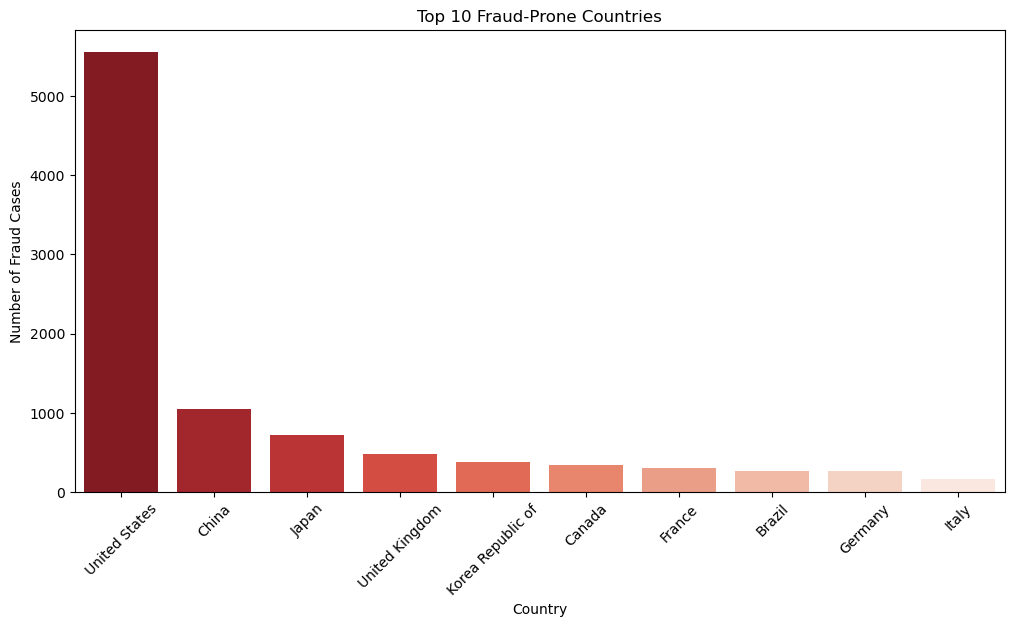

In [9]:
if 'country' in df_merged.columns:
    fraud_by_country = df_merged.groupby('country')['class'].sum().sort_values(ascending=False)

    # Select top 10 fraud-prone countries
    fraud_by_country = fraud_by_country.head(10)

    # Plot fraud distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=fraud_by_country.index, y=fraud_by_country.values, palette="Reds_r")
    plt.xticks(rotation=45)
    plt.title("Top 10 Fraud-Prone Countries")
    plt.ylabel("Number of Fraud Cases")
    plt.xlabel("Country")
    plt.show()
else:
    print("Error: 'country' column not found in df_merged!")


In [10]:
##Normalize & Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for scaling
num_features = ["purchase_value",'age']

# Apply StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_fraud[num_features] = scaler.fit_transform(df_fraud[num_features])

# Display scaled values
print(df_fraud[num_features].head())

        purchase_value       age
110447        0.494721  0.331793
2589         -0.214781 -0.364448
16752        -0.214781 -0.132367
51261        -0.214781  0.795954
17            0.985915  0.563874


In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Features to One-Hot Encode (only low-cardinality ones)
low_cardinality_features = ["source", "sex", "browser"]  # Avoid "device_id"

# Features to Label Encode (high-cardinality ones)
high_cardinality_features = ["device_id", "country"]

# One-Hot Encode only low-cardinality categorical variables
df_merged = pd.get_dummies(df_merged, columns=low_cardinality_features, drop_first=True)

# Label Encode high-cardinality features
label_encoder = LabelEncoder()
for feature in high_cardinality_features:
    if feature in df_merged.columns:
        df_merged[feature] = label_encoder.fit_transform(df_merged[feature])

# Display transformed data
print(df_merged.head())

   user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

   device_id  age  ip_address  class  country  source_Direct  source_SEO  \
0      46780   30    16778864      0        7          False        True   
1      70073   34    16842045      0      162          False        True   
2      53448   29    16843656      0       36          False       False   
3      92195   30    16938732      0       36           True       False   
4     107434   37    16971984      0      162          False        True   

   sex_M  browser_FireFox  browser_IE  browser_Opera  browser_Safari  
0  False            False       False  

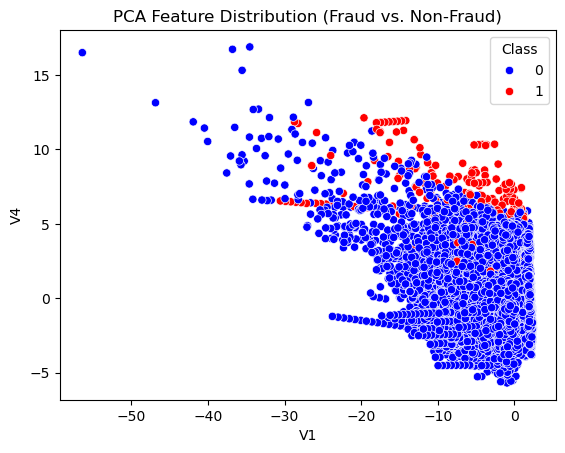

In [12]:
# Select first two PCA components
sns.scatterplot(x=df_credit["V1"], y=df_credit["V4"], hue=df_credit["Class"], palette=["blue", "red"])
plt.title("PCA Feature Distribution (Fraud vs. Non-Fraud)")
plt.show()

In [13]:
# Select numerical features for scaling
num_features = ["Amount"]

# Apply StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_credit[num_features] = scaler.fit_transform(df_credit[num_features])

# Display scaled values
print(df_credit[num_features].head())

     Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403


In [14]:
# For credit card dataset
X_credit = df_credit.drop(columns=["Class"])
y_credit = df_credit["Class"]

# For fraud dataset
X_fraud = df_merged.drop(columns=["class","purchase_time", "signup_time"])
y_fraud = df_merged["class"]


In [15]:
from sklearn.model_selection import train_test_split

# Split for credit card fraud dataset
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

# Split for e-commerce fraud dataset
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)


In [16]:
##Model Training & Evaluation for creidit data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50)
}

# Training loop
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_credit, y_train_credit)
    y_pred = model.predict(X_test_credit)

    results[name] = {
        "Accuracy": accuracy_score(y_test_credit, y_pred),
        "Precision": precision_score(y_test_credit, y_pred),
        "Recall": recall_score(y_test_credit, y_pred),
        "F1 Score": f1_score(y_test_credit, y_pred),
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


Training Logistic Regression...


c:\Users\hp\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training MLP...
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.998859   0.726027  0.540816  0.619883
Decision Tree        0.999034   0.697248  0.775510  0.734300
Random Forest        0.999614   0.987179  0.785714  0.875000
Gradient Boosting    0.998947   0.737500  0.602041  0.662921
MLP                  0.998280   0.000000  0.000000  0.000000


c:\Users\hp\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
##Model Training & Evaluation for creidit data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50)
}

# Training loop
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_fraud, y_train_fraud)
    y_pred = model.predict(X_test_fraud)

    results[name] = {
        "Accuracy": accuracy_score(y_test_fraud, y_pred),
        "Precision": precision_score(y_test_fraud, y_pred),
        "Recall": recall_score(y_test_fraud, y_pred),
        "F1 Score": f1_score(y_test_fraud, y_pred),
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

Training Logistic Regression...


c:\Users\hp\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training MLP...
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.906659   0.000000  0.000000  0.000000
Decision Tree        0.891134   0.431123  0.520531  0.471627
Random Forest        0.947193   0.908665  0.482787  0.630553
Gradient Boosting    0.906814   0.750000  0.002489  0.004961
MLP                  0.906659   0.000000  0.000000  0.000000


c:\Users\hp\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
